## Problem 0

We have spent several sessions in class working on our own testing framework. For some parts of our implementation (like the parametrization decorator, the mock decorator, and the matchers), we focused our efforts on lots of independent _functions_. For other parts of our implementation (in particular the test runner), we added behavior to a class from which we expect our clients (developers using our test framework) to inherit.

Knowing what you now know about when to consider a function-based approach versus an object-based approach, why do you think we made these choices? 

Please put your answer in `problem_0.md`.

## Problem 1

Programming language designers have to decide when the expressions in their programming language will be evaluated. They have two options:

1. Normal order (also called **lazy evaluation**): expressions are evaluated whenever their output is required
2. Applicative order (also called **eager evaluation**) expressions are evaluated whenever they are defined.

You can use a test to reveal whether the expressions in a language are evaluated eagerly or lazily. Here's how it works:

1. define a method that calls itself recursively forever
2. define another method that takes two arguments. If the first argument is equal to zero, it returns zero. Otherwise it returns the second argument.
3. call the second method with a zero as the first argument and a call to the first method as the second argument.
4. Because the first argument is zero, if the language evaluates lazily, it will return zero before ever running the second argument (the function that calls itself forever). If the language evaluates eagerly, it will evaluate the call to the first method when it is passed _into_ the second method, and the program will run forever (or, more likely, error out). 

Here is the test for Python:

In [ ]:
def p():
    p()

def test(x, y):
    if x == 0:
        return 0
    else:
        return y
    
test(0, p())

1. Based on your results running that test, do you think python evaluates expressions in normal order (lazy) or applicative order (eager)? Why?

2. Find a way to change the `test` method so that it only runs `p()` if the first argument `x` is _not_ equal to zero. What did you change?

3. Can you think of a situation where you might want to define a method but make sure that that method is _only_ called if and when its result is _absolutely_ needed? In other words, describe a situation where you might want lazy evaluation.

Please put your answer in `problem_1.md`.

### Problem 2: 

Write a method called `to_generator` that takes in either a filter or a map and returns a generator that produces the same results as the map or filter.

You can either make a function that yields values or you can use a generator literal, which is the same syntax as a list comprehension but with parentheses instead of brackets.

List comprehension for doubling values: `[x * 2 for x in [1,2,3,4,5]]`

Generator literal for doubling values: `(x * 2 for x in [1,2,3,4,5])`

**A good litmus test for if you did the right thing here**: _At no point_ should you convert the result of the `map` or `filter` into a list.

In [ ]:
# Don't worry about understanding these two lines.
# They are commands we use to get this notebook to autoreload
# so you don't have to rerun your kernel every time you change your homework files.
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')
from test_framework_exercise.phoenix_test.matchers import FailedAssertion, Assertion, assert_that
from test_framework_exercise.phoenix_test.test import Test
sys.path.remove('..')

In [ ]:
from problem_2 import to_generator

We have an exciting development this week: Your testing framework is ready for some basic use. So, we will use it for writing your homework tests!

In [ ]:
import types 

class ToGeneratorTest(Test):
    def test_map_to_generator(self):
        g = to_generator(map(lambda x: x + 1, [1,2,3,4,5]))
        assert_that(type(g)).equals(types.GeneratorType)
        assert_that(list(g)).equals([2, 3, 4, 5, 6])
        
    def test_filter_to_generator(self):
        g = to_generator(filter(lambda x: x%2 == 0, [1,2,3,4,5]))
        assert_that(type(g)).equals(types.GeneratorType)
        assert_that(list(g)).equals([2, 4])
        
ToGeneratorTest().run()

### Problem 3: 

As we've discussed, Python _possesses_ map and filter functions, as well as a _reduce_ function that uses an **aggregation** function to combine all the things in a list to a single item.

But, as we've _also_ discussed, the API for using these leaves a lot to be desired.

Some other programming languages that support functional programming provide something called a **stream**. A stream is a way of operating on items within a collection that allows you to do several operations one after the other. For example, in Java you can do:

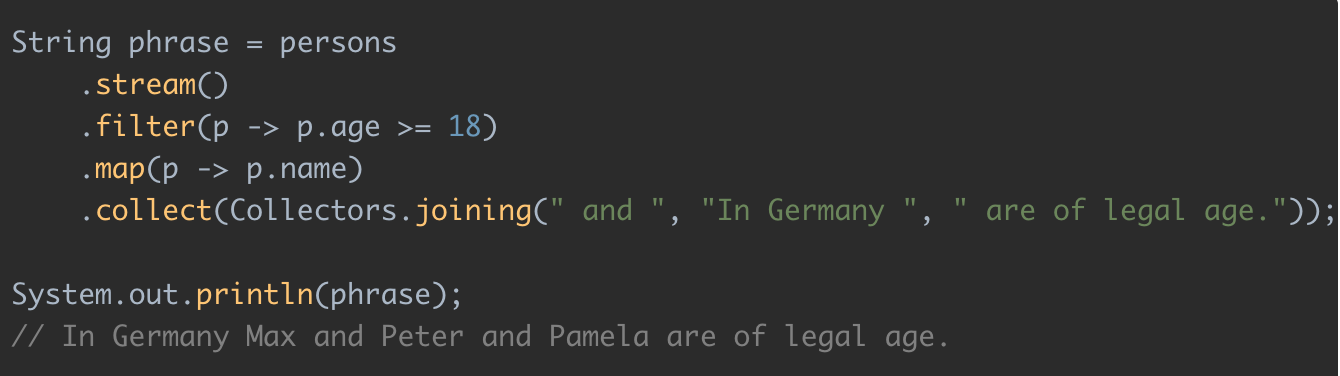

Let's make a similar API for Python, so that you could do:

```
Stream(["holy", "forking", "shirtballs"]) \
        .map(lambda x: str.capitalize(x)) \
        .filter(lambda x: len(x) < 9) \
        .reduce(lambda x, y: x + y)
```

The result of the above would be `HolyForking`.

- Step 1: list is converted to a stream.
- Step 2: each string in the stream is capitalized.
- Step 3: only strings with a length less than 9 remain in the stream
- Step 4: All the items in the stream are added together.

There is a name for APIs that allow you to chain methods together like this: we call them a **fluent interface**. To make a fluent interface work, you need to return the object itself from each method so that the next method in the sequence can be called on it. For example:

In [ ]:
class SentenceMaker():
    def __init__(self):
        self.sentence = ""
        
    def this(self):
        self.sentence += "This "
        return self
    
    def iz(self):
        self.sentence += "is "
        return self
    
    def a(self):
        self.sentence += "a "
        return self
    
    def fluent(self):
        self.sentence += "fluent "
        return self
    
    def interface(self):
        self.sentence += "interface."
        return self
    
    def to_string(self):
        return self.sentence
    
SentenceMaker().this().iz().a().fluent().interface()

You'll notice that the returned value is the object itself, so we need to call a method at the end to get the ultimate result we want. That's what `collect()` in the Java example is doing.

In [ ]:
SentenceMaker().this().iz().a().fluent().interface().to_string()

Your implementation of `Stream` should have the `map`, `filter`, and `reduce` functions, all of which should return the stream object. 

It will also have two functions that _don't_ return the stream object. The first one,`as_list`, will convert your stream to a list and return it. The second one, `reduce`, does not return a stream because its job is to apply some kind of function that turns your collection of items into _one_ item, like a sum or product. You'll want to return that item from the `reduce` function rather than the stream itself.

In [ ]:
from problem_3 import Stream

class StreamTests(Test):
    def test_to_list(self):
        assert_that(
            Stream(["holy", "forking", "shirtballs"]).as_list()) \
        .equals(["holy", "forking", "shirtballs"])
    
    def test_map(self):
        assert_that(
            Stream(["holy", "forking", "shirtballs"]) \
              .map(lambda x: str.capitalize(x)) \
            .as_list()
        ).equals(["Holy", "Forking", "Shirtballs"])
    
    def test_filter(self):
        assert_that(
            Stream(["holy", "forking", "shirtballs"]) \
              .filter(lambda x: len(x) < 9) \
              .as_list()
        ).equals(["holy", "forking"])
    
    def test_reduce(self):
        assert_that(
            Stream(["holy", "forking", "shirtballs"]) \
              .reduce(lambda x, y: x + y) \
        ).equals("holyforkingshirtballs")
        
    def test_the_whole_flow(self):
        assert_that(
            Stream(["holy", "forking", "shirtballs"]) \
              .map(lambda x: str.capitalize(x)) \
              .filter(lambda x: len(x) < 9) \
              .reduce(lambda x, y: x + y)
        ).equals("HolyForking")

StreamTests().run()